# Bar code detector
Use a combination of image thresholding, edge detection and morphological operations to detect a bar code in an image.

#### Comments
Note that this method is one of many valid approaches to detecting bar codes in an image. There is even a Python Library, pyzbar which will automatically find and read barcodes. \
The purpose of this assignment is primarily to show how morphological processing can be used to identify features of interest in an image

In [14]:
# Load in required libraries
%matplotlib inline
import os
import os.path as op
import numpy as np
import cv2
import matplotlib.pylab as plt

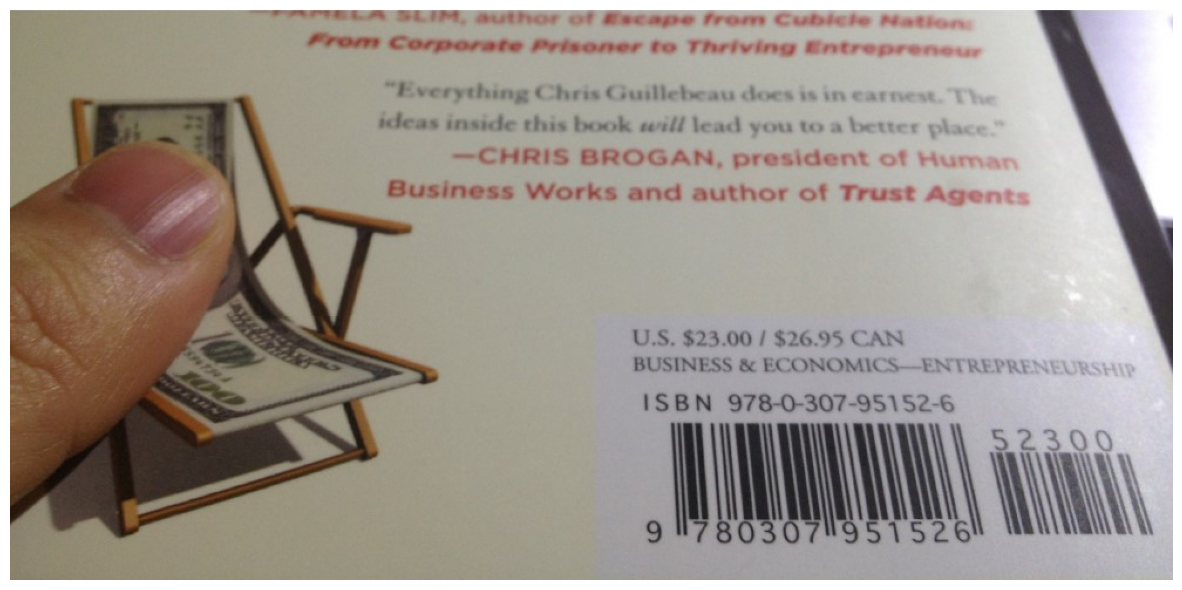

In [15]:
# read in and display image. Note that there are 4 bar code images provided
img = cv2.imread('bar_code1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert bgr to rgb

# display image
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.axis('off')
plt.show()

## Convert image to greyscale
Use open cv cvtColor function to do this

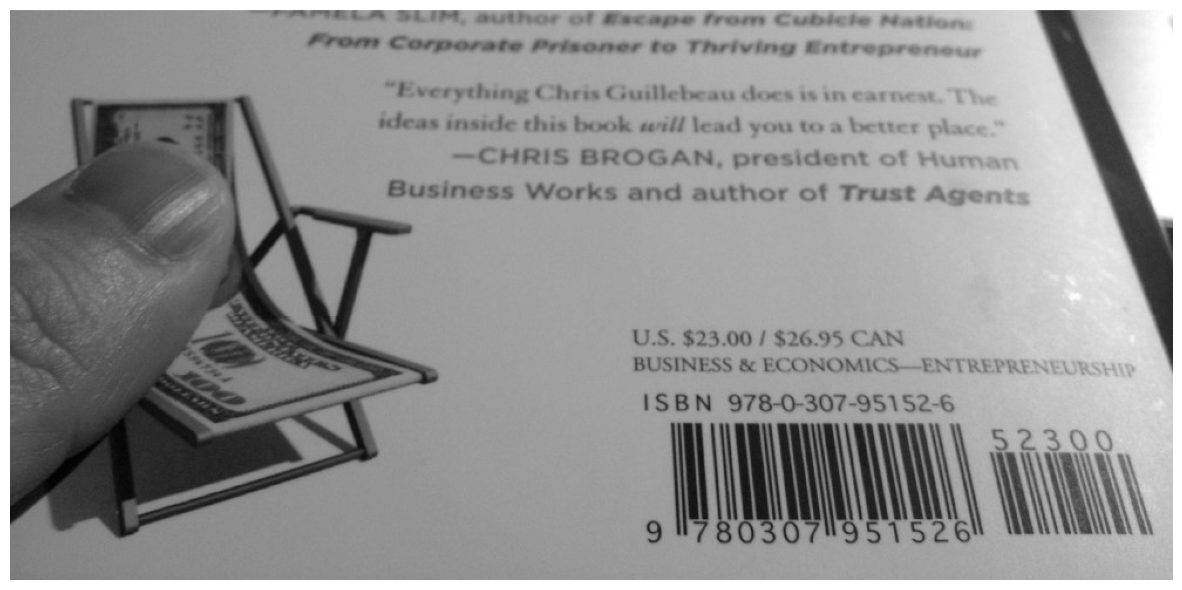

In [16]:
# convert to greyscale using opencv cvtColor
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# display the greyscale image
plt.figure(figsize=(15,15))
plt.imshow(img_gray,cmap = 'gray')
plt.axis('off')
plt.show()

## Calculate the image gradients

In this step, you need to find the image gradients (i.e. the edges of the image).
There are a number of ways to do this.

Example gradient functions are cv2.Sobel or cv2.Laplacian. If you use Sobel, it is recommended to try calculating both horizontal and vertical gradients, and use cv2.subtract to subtract x and y gradients. This is done by setting dx and dy parameters. 

experiment with differenct ksize parameters (size of filtering kernel)
For ddepth, set this to ddepth = cv2.CV_8UC1

for whichever gradient detector used, once you have calculated the gradients, scale and convert the image using cv2.convertScaleAbs function.

Variations in Kernel Size affecting the gradient and results


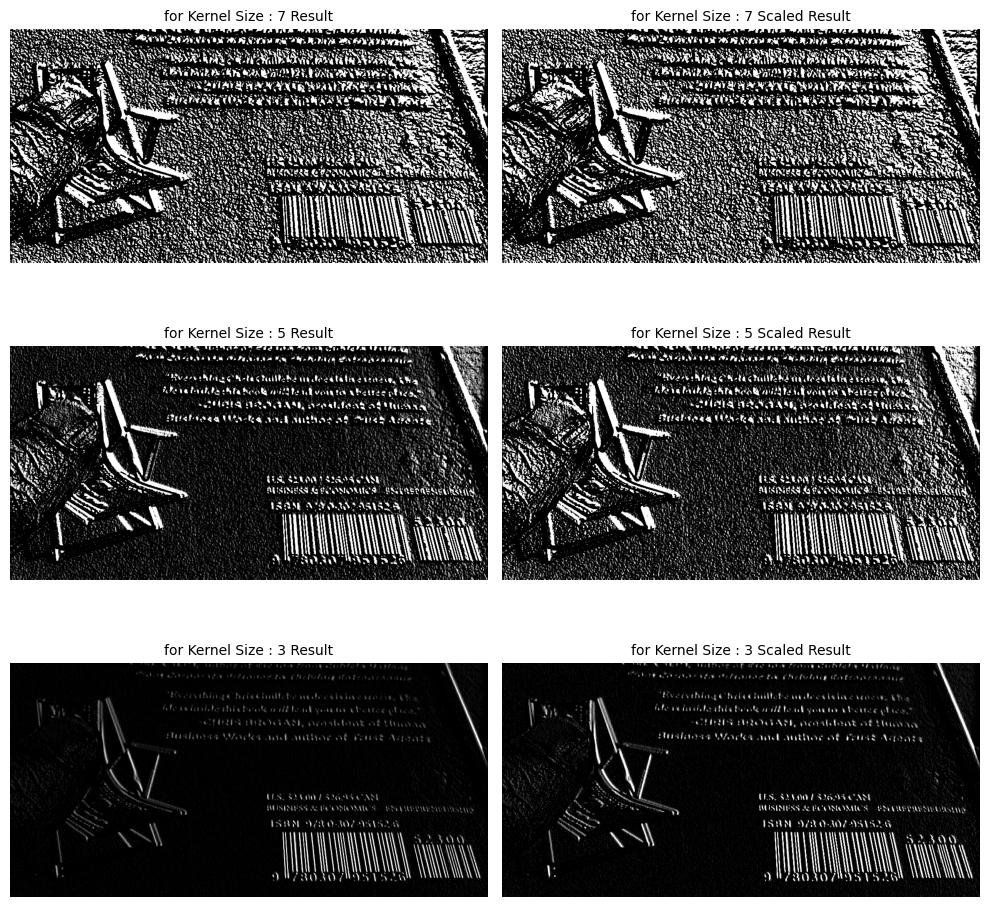

In [17]:
#calculate x & y gradient using Sobel edge detector
kernel_size = [7,5,3] # The values for Kernel size have to be odd number
print("Variations in Kernel Size affecting the gradient and results")
i = 1
plt.figure(figsize=(10,10))
for _ in kernel_size:
    sobel_x = cv2.Sobel(img_gray, cv2.CV_8UC1, 1, 0, ksize = _) # (CV_8UC1= Get result as 8-bit Unsigned Integer Image)
    sobel_y = cv2.Sobel(img_gray, cv2.CV_8UC1, 0, 1, ksize = _) # (0 = Xaxis , 1 = Y axis)
    # subtract the y-gradient from the x-gradient
    sobel_result = cv2.subtract(sobel_x, sobel_y)# sobel_y - sobel_x (Y Gradient - X Gradient)
    # scale the image using convertScaleAbs function
    sobel_scaled_result = cv2.convertScaleAbs(sobel_result, alpha=2, beta=0) # Liner Scaling,Adjust Intensity Values(alpha=2(Contrast),beta=0(Brightness))
    plt.subplot(3,2,i)
    plt.imshow(sobel_result, cmap = 'gray')
    plt.title(f"for Kernel Size : {_} Result", size = 10)
    plt.axis('off')
    plt.subplot(3,2,i+1)
    plt.imshow(sobel_scaled_result, cmap = 'gray')
    plt.title(f"for Kernel Size : {_} Scaled Result", size = 10)
    plt.axis('off')  
    i += 2
plt.tight_layout() 
plt.show()
plt.close()

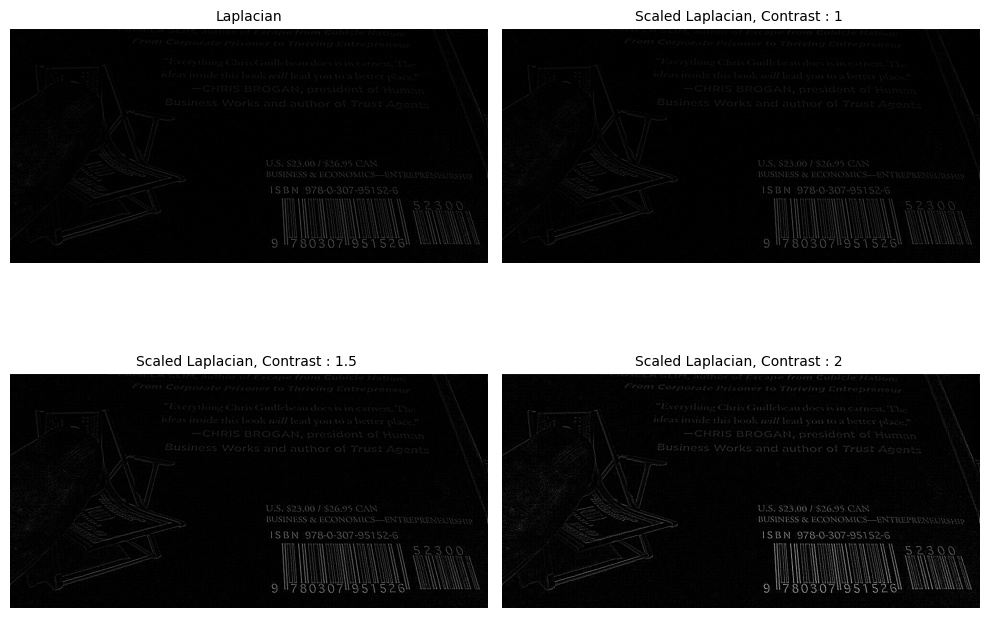

In [18]:
# Alternative - Laplacian
contrast = [1,1.5,2]
laplacian = cv2.Laplacian(img_gray, cv2.CV_8UC1)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(laplacian, cmap = 'gray')
plt.title("Laplacian", size = 10)
plt.axis('off')
i = 2
for c in contrast:
    laplacian_scaled_result = cv2.convertScaleAbs(laplacian, alpha=c, beta=50) # Liner Scaling,Adjust Intensity Values(alpha=2(Contrast),beta=0(Brightness))
    # display the gradient image
    plt.subplot(2,2,i)
    i += 1
    plt.imshow(laplacian_scaled_result, cmap = 'gray')
    plt.title(f"Scaled Laplacian, Contrast : {c} ", size = 10)
    plt.axis('off')
    plt.tight_layout()
plt.show()
plt.close()

## Blur the image
This reduces noise and also removes some smaller gradients, and keeps only large gradients

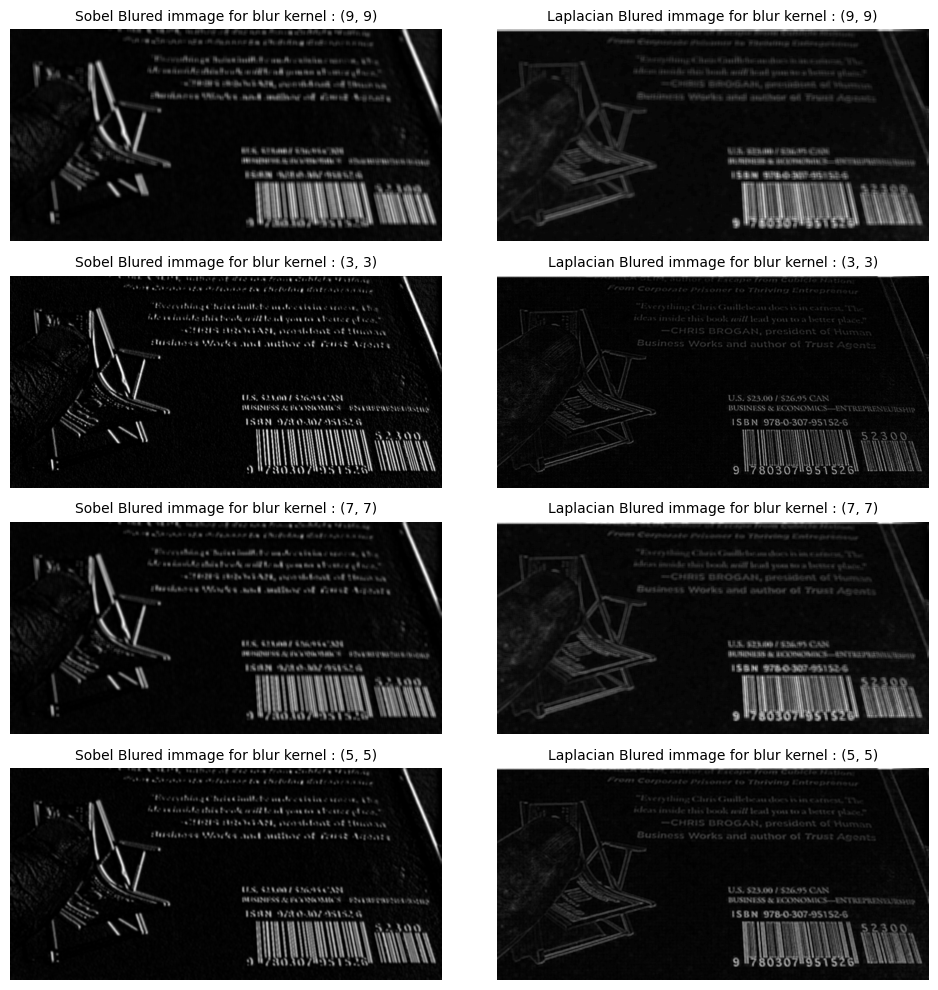

In [19]:
# blur the image
Blur_kernel = [(9,9),(3,3),(7,7),(5,5)]
plt.figure(figsize=(10,10))
i = 1
for blur in Blur_kernel:
    blurred_image_laplacian = cv2.blur(laplacian_scaled_result, blur)
    blurred_image_sobel = cv2.blur(sobel_scaled_result, blur) # [(3,3) Size of kernel , 0 = Deviation of kernel]
    # display the gradient image
    plt.subplot(4,2,i)
    plt.imshow(blurred_image_sobel, cmap = 'gray')
    plt.title(f"Sobel Blured immage for blur kernel : {blur}", size = 10)
    plt.axis('off')
    plt.subplot(4,2,i+1)
    plt.imshow(blurred_image_laplacian, cmap = 'gray')
    plt.title(f"Laplacian Blured immage for blur kernel : {blur}", size = 10)
    plt.axis('off')
    i += 2
plt.tight_layout()
plt.show()
plt.close()

## Convert to binary image
For this project, use manual thresholding use cv2.threshold.
Experiment with manual thresholding (approx 225 works well) to get a result where the bar code is clearly visible. 

Alternatively, you could try using Otsu's method for automatic thresholding

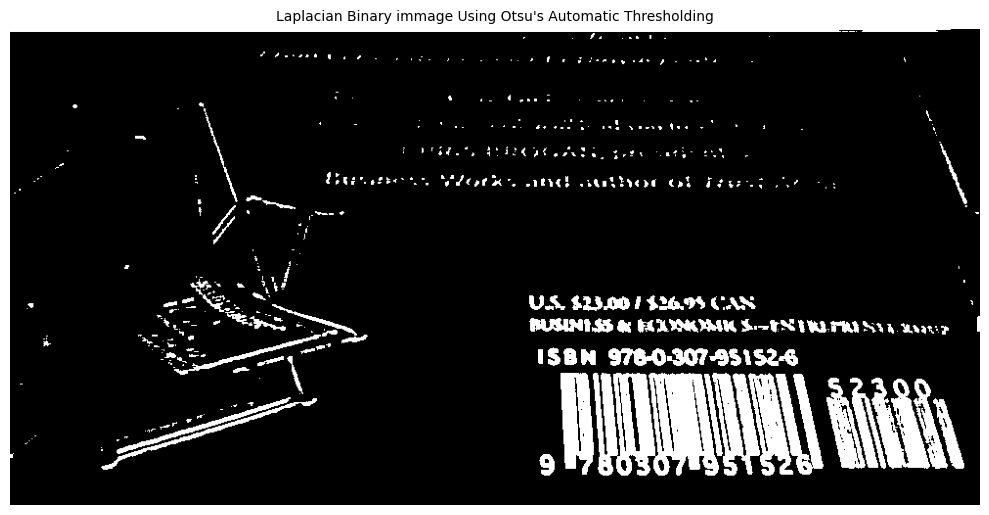

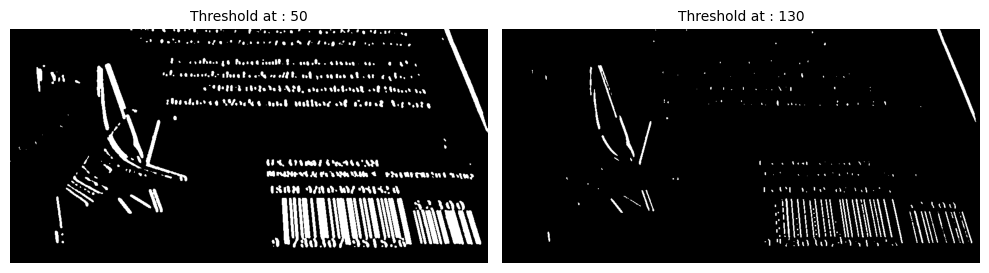

In [20]:
# threshold the image
ret1,Laplacian_thresh = cv2.threshold(blurred_image_laplacian,120,255,cv2.THRESH_OTSU) # Automatic Thresholding using Otsus
# display the thresholded image
plt.figure(figsize=(10,10))
plt.imshow(Laplacian_thresh, cmap = 'gray')
plt.title("Laplacian Binary immage Using Otsu's Automatic Thresholding", size = 10)
plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()
th_lb = [50, 130] # Values under which all pixels clipped to Zero
plt.figure(figsize=(10,10))
i = 1
for lb in th_lb:
    ret2,Sobel_thresh = cv2.threshold(blurred_image_sobel,lb,255,cv2.THRESH_BINARY)
    plt.subplot(2,2,i)
    i += 1
    plt.imshow(Sobel_thresh, cmap = 'gray')
    plt.title(f"Threshold at : {lb}", size = 10)
    plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()

## Perform erosion and dilation to clean up image

The purpose of this step is slightly counterintuitive - it is to define a box shaped area where the bar code is

To do this, perform the following steps:
- Define a structuring element with the function cv2.getStructuringElement. A rectangular structuring element should work well for this application...
- Perform morphological closing using the opencv morphologyEx function
- perform an additional set of erosions using opencv erode function. Experiment with the number of iterations. 4 works well..
- perform an additional set of dilations  using opencv dilate function. Experiment with the number of iterations. 4 works well..

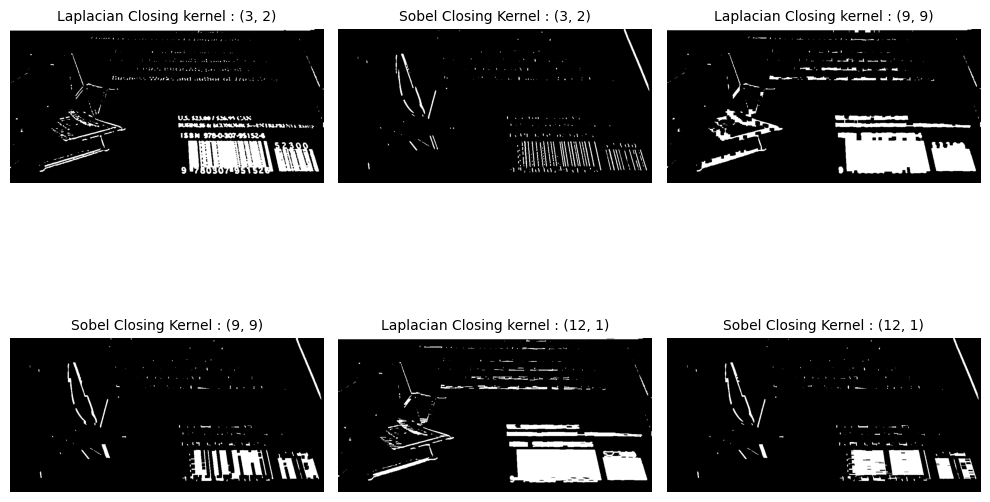

In [21]:
# construct a closing kernel and apply it to the thresholded image
kernel_size = [(3,2),(9,9),(12,1)]
plt.figure(figsize=(10,10))
i = 1
for k in kernel_size:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, k)
    Closing_laplacian = cv2.morphologyEx(Laplacian_thresh, cv2.MORPH_CLOSE, kernel)
    Closing_sobel     = cv2.morphologyEx(Sobel_thresh, cv2.MORPH_CLOSE, kernel)
    plt.subplot(3,3,i)
    plt.imshow(Closing_laplacian, cmap = 'gray')
    plt.title(f"Laplacian Closing kernel : {k}", size = 10)
    plt.axis('off')
    plt.subplot(3,3,i+1)
    i += 2
    plt.imshow(Closing_sobel, cmap = 'gray')
    plt.title(f"Sobel Closing Kernel : {k}", size = 10)
    plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()

Laplacian


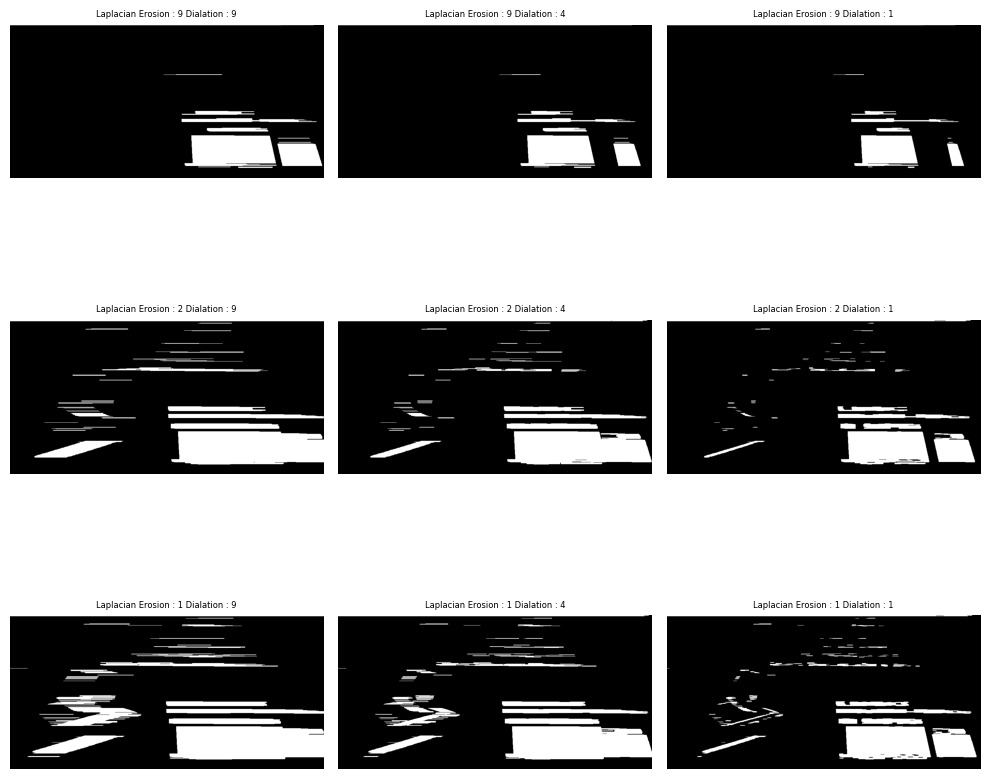

In [22]:
# perform a series of erosions and dilations
erod_iter = [9,2,1]
dialate_iter = [9,4,1]
plt.figure(figsize=(10,10))
i = 1
print("Laplacian")
for e in erod_iter:
    for d in dialate_iter:
        laplacian_erode = cv2.erode(Closing_laplacian, kernel, iterations=e)
        laplacian_dialate = cv2.dilate(laplacian_erode, kernel, iterations=d)
        # display the thresholded image
        plt.subplot(3,3,i)
        plt.imshow(laplacian_dialate, cmap = 'gray')
        plt.title(f"Laplacian Erosion : {e} Dialation : {d}", size = 6)
        plt.axis('off')
        i += 1
plt.tight_layout()
plt.show()
plt.close()

Sobel


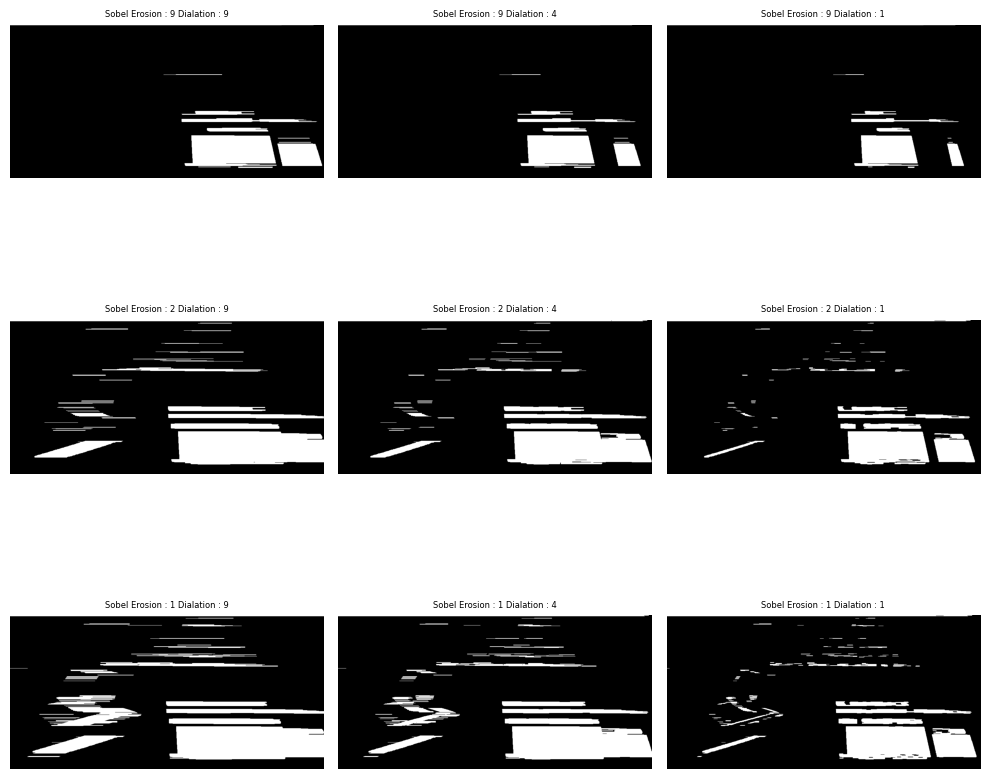

In [23]:
plt.figure(figsize=(10,10))
i = 1
print("Sobel")
for e in erod_iter:
    for d in dialate_iter:
        sobel_erode = cv2.erode(Closing_laplacian, kernel, iterations=e)
        sobel_dialate = cv2.dilate(sobel_erode, kernel, iterations=d)
        # display the thresholded image
        plt.subplot(3,3,i)
        plt.imshow(sobel_dialate, cmap = 'gray')
        plt.title(f"Sobel Erosion : {e} Dialation : {d}", size = 6)
        plt.axis('off')
        i += 1
plt.tight_layout()
plt.show()
plt.close()

## Find the barcode

Use the opencv findContours function to find counters in your processed image. Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

Once you have found all of the contours in the image, use the sorted function to arrange the counters by size(hint: set key = cv2.contourArea)

Define a box around the largest contour using the opencv minAreaRect function\

Use the opencv drawContours function to draw the box around the largest contour (i.e. the barcode area)




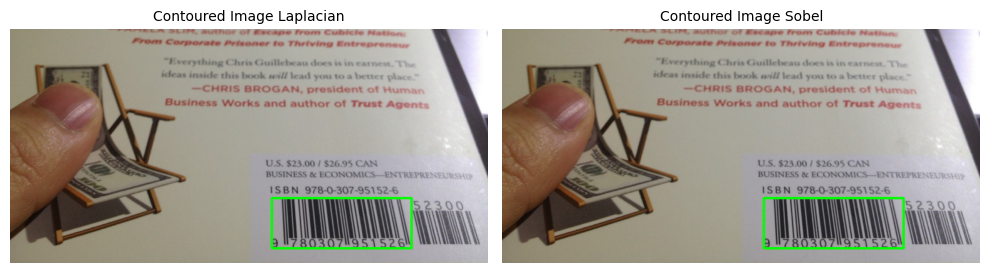

In [24]:
# Find the countours in the image using the cv2.findContours function
contours_laplacian, reta1 = cv2.findContours(laplacian_dialate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_sobel, reta1 = cv2.findContours(sobel_dialate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# sort the contours by size using cv2.contourArea
sorted_contours_laplacian = sorted(list(contours_laplacian), key=cv2.contourArea, reverse=True)
sorted_contours_sobel = sorted(list(contours_sobel), key=cv2.contourArea, reverse=True)
# compute the rotated bounding box of the largest contour
largest_contour_laplacian = sorted_contours_laplacian[0]
largest_contour_sobel = sorted_contours_sobel[0]
rect_laplacian = cv2.minAreaRect(largest_contour_laplacian)
rect_sobel = cv2.minAreaRect(largest_contour_sobel)
# draw a bounding box arounded the detected barcode and display the
# image
rotated_box_image_laplacian = img.copy()
rotated_box_image1_sobel = img.copy()
box_points_laplacian = cv2.boxPoints(rect_laplacian).astype(int)
box_points_sobel = cv2.boxPoints(rect_sobel).astype(int)
cv2.drawContours(rotated_box_image_laplacian, [box_points_laplacian], 0, (0, 255, 0), 4)
cv2.drawContours(rotated_box_image1_sobel, [box_points_sobel], 0, (0, 255, 0), 4)
plt.imsave("Barcode_Identified_bar_code1.jpg",rotated_box_image_laplacian)
# display the thresholded image
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(rotated_box_image_laplacian, cmap = 'gray')
plt.title("Contoured Image Laplacian", size = 10)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(rotated_box_image1_sobel, cmap = 'gray')
plt.title("Contoured Image Sobel", size = 10)
plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()

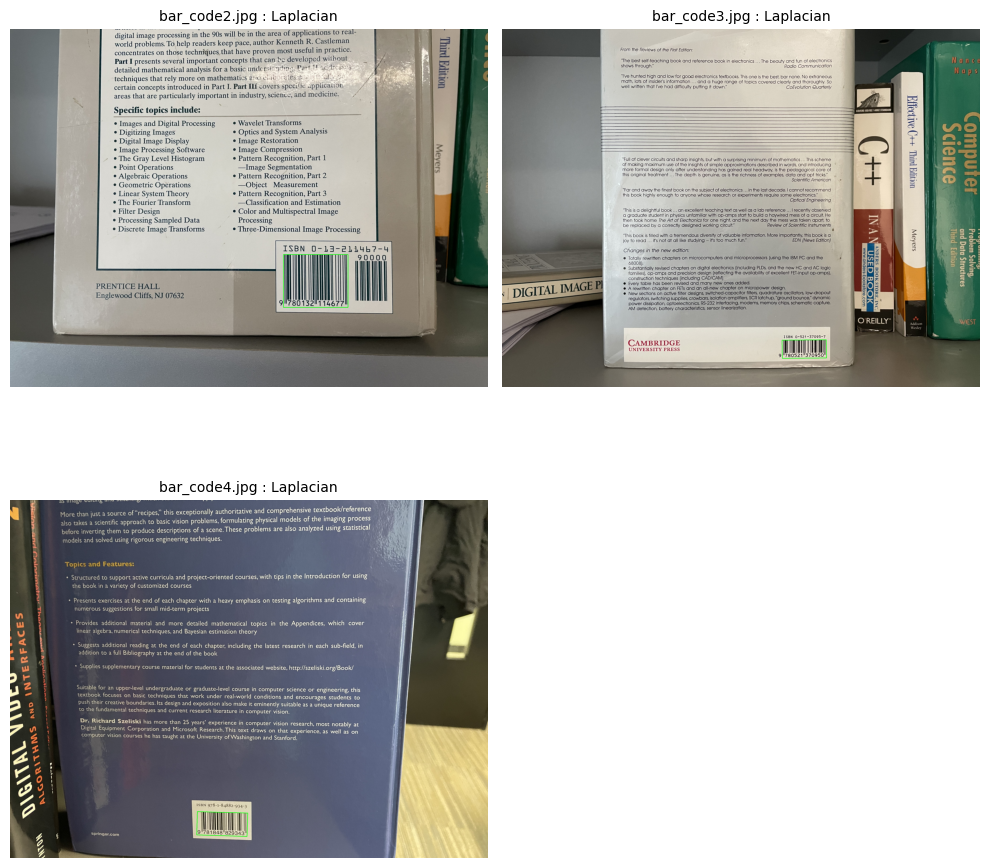

In [25]:
Images_List = ['bar_code2.jpg', 'bar_code3.jpg', 'bar_code4.jpg']
i = 1
plt.figure(figsize=(10,10))
for image in Images_List: 
    img = cv2.imread(image) # Read Image
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert bgr to rgb
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # GrayScale Image
    laplacian = cv2.Laplacian(img_gray, cv2.CV_8UC1) # Laplacian Edge Detection
    laplacian_scaled_result = cv2.convertScaleAbs(laplacian, alpha=2, beta=50) # Laplacian Scaled Result
    blurred_image_laplacian = cv2.blur(laplacian_scaled_result, (3,3)) # Blurring to Remove Noice and smaller gradients
    ret1,Laplacian_thresh = cv2.threshold(blurred_image_laplacian,120,255,cv2.THRESH_OTSU) # Binary Thresholding
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,2))
    Closing_laplacian = cv2.morphologyEx(Laplacian_thresh, cv2.MORPH_CLOSE, kernel) # Closing Operation
    laplacian_erode = cv2.erode(Closing_laplacian, kernel, iterations=2) # Errode for 1 Iterations
    laplacian_dialate = cv2.dilate(laplacian_erode, kernel, iterations=9) # Dilate for 1 +Iterations
    contours_laplacian, reta1 = cv2.findContours(laplacian_dialate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Find Contour
    sorted_contours_laplacian = sorted(list(contours_laplacian), key=cv2.contourArea, reverse=True) # Sort Contour reverse order
    largest_contour_laplacian = sorted_contours_laplacian[0] # Largest COntour
    rect_laplacian = cv2.minAreaRect(largest_contour_laplacian) # Create Rectangle
    rotated_box_image_laplacian = img.copy() # Create Original Image Copy
    box_points_laplacian = cv2.boxPoints(rect_laplacian).astype(int) # Create Box Points
    cv2.drawContours(rotated_box_image_laplacian, [box_points_laplacian], 0, (0, 255, 0), 4) # draw Contour
    plt.imsave("Barcode_Identified_"+image,rotated_box_image_laplacian)
    # Plotting in Line
    plt.subplot(2,2,i)
    i += 1
    plt.imshow(rotated_box_image_laplacian)
    plt.title(f"{image} : Laplacian", size = 10)
    plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()

## Suggested improvements

This process works reasonably well for many images, but will not always find the correct answer. Suggest ways to improve the performance of this algorithm. Note: stating "use deep learning", or any variation of this statement, is not allowed!!!

Following Improvements can be made.

- A better Edge detector like Canny edge detector
    - Canny Does a better job at highlighting the high pass features of the image than laplacian.
    - if there are more than 1 Barcodes in the image but the itensity or positional plane varies for both barcodes i.e. barcodes are in a offset

- Instead of Otsu's Automatic thresholding we can use Adaptive Thresholding to see better Results
    - Because In Images where the lighting conditions are low and/or the primary objective is object detection, In such cases  Adaptive thresholding gives us a better control over the process.
    - Adaptive thresholding allows us to fine tune the image by considering local variations in the image as well, compared to OTSU's which considers one global high points in regards to which entire image is thresholded.


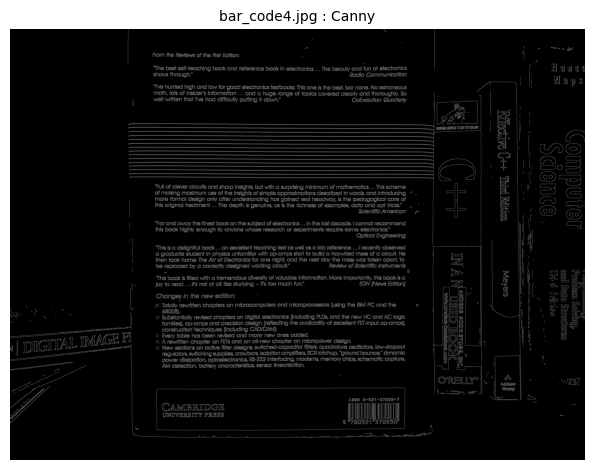

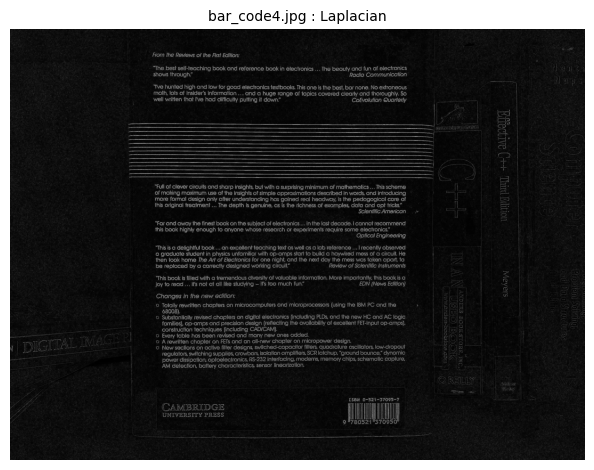

In [26]:
img = cv2.imread('bar_code3.jpg') # Read Image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert bgr to rgb
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # GrayScale Image
Canny = cv2.Canny(img_gray, 190,130) # Laplacian Edge Detection
Canny_Scaled = cv2.convertScaleAbs(Canny, alpha=2, beta=50) # Laplacian Scaled Result
laplacian = cv2.Laplacian(img_gray, cv2.CV_8UC1) # Laplacian Edge Detection
laplacian_scaled_result = cv2.convertScaleAbs(laplacian, alpha=2, beta=50) # Laplacian Scaled Result
# Plotting in Line
plt.imshow(Canny_Scaled, cmap = 'gray')
plt.title(f"{image} : Canny", size = 10)
plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()
plt.imshow(laplacian_scaled_result, cmap = 'gray')
plt.title(f"{image} : Laplacian", size = 10)
plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()